#**IMPORT LIBRARY**#

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pydot
import seaborn as sns
import matplotlib.pyplot as plt

#**LOAD DATASET**#

In [ ]:
# 1. Mount Gdrive ke google colab

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 2. path letak file csv berada

path_to_csv= '/content/drive/MyDrive/DigitalentDataScience/banjirpredic_.csv'

In [ ]:
bp = pd.read_csv('/content/drive/MyDrive/DigitalentDataScience/banjirpredic_.csv')
bp.head()

,bulan/tahun,mingguan,curah hujan,rata-rata banyak hari hujan,suhu min,rerata suhu,suhu max,debit sungai,kondisi banjir
0,January 2020,minggu 1,124.25,4.25,26.0,28.7,34.393499,648.2,0
1,January 2020,minggu 2,124.25,4.25,26.0,28.7,34.393499,648.2,0
2,January 2020,minggu 3,124.25,4.25,26.0,28.7,34.393499,648.2,0
3,January 2020,minggu 4,124.25,4.25,26.0,28.7,34.393499,353.3,1
4,January 2020,minggu 5,124.25,4.25,26.0,28.7,34.393499,353.3,1


#**PREPROCESSING**#

In [ ]:
bp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   bulan/tahun                  167 non-null    object 
 1   mingguan                     167 non-null    object 
 2   curah hujan                  167 non-null    float64
 3   rata-rata banyak hari hujan  167 non-null    float64
 4   suhu min                     167 non-null    float64
 5   rerata suhu                  167 non-null    float64
 6   suhu max                     167 non-null    float64
 7   debit sungai                 167 non-null    float64
 8   kondisi banjir               167 non-null    int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 11.9+ KB


In [ ]:
# Drop kolom yang tidak diperlukan
bp = bp.drop([ 'bulan/tahun', 'mingguan', 'rerata suhu'], axis=1)

# Menampilkan beberapa baris pertama dari dataframe setelah drop kolom
print(bp.head())


   curah hujan  rata-rata banyak hari hujan  suhu min   suhu max  \
0       124.25                         4.25      26.0  34.393499   
1       124.25                         4.25      26.0  34.393499   
2       124.25                         4.25      26.0  34.393499   
3       124.25                         4.25      26.0  34.393499   
4       124.25                         4.25      26.0  34.393499   

   debit sungai  kondisi banjir  
0         648.2               0  
1         648.2               0  
2         648.2               0  
3         353.3               1  
4         353.3               1  


#**MENENTUKAN TARGET DAN FITUR**#

In [ ]:
#1. Memisahkan fitur dan target

X = bp.drop(['kondisi banjir'], axis=1) ##ini untuk menentukan fitur (disini kolom kondisi banjir dikecualikan karena sebagai target)

y = bp['kondisi banjir'] #memilih kolom kondisi banjir sebagai kolom target

#2. print shape untuk mengecek berapa baris dan berapa kolom fitur dan target tsb
print(f"shape of x : {X.shape}")
print(f"shape of y : {y.shape}")

shape of x : (167, 5)
shape of y : (167,)


#**SPLIT DATA TESTING & DATA TRAINING**#

In [ ]:
#1. memisahkan data training dan data Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
print('Training Features Shape:', X_train.shape)
print('Training Target Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Target Shape:', y_test.shape)

Training Features Shape: (133, 5)
Training Target Shape: (133,)
Testing Features Shape: (34, 5)
Testing Target Shape: (34,)


In [ ]:
# check data types in X_train (fitur)

X_train.dtypes

curah hujan                    float64
rata-rata banyak hari hujan    float64
suhu min                       float64
suhu max                       float64
debit sungai                   float64
dtype: object

#**Pemodelan dengan Nilai n_estimator Terbaik**#

In [ ]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd

# Asumsi X_train, y_train, X_test, y_test udah ada

# List of n_estimators
n_estimators_list = [0, 25, 50, 70, 100]

# Buat list sementara buat simpan hasil
results_temp = []

# Loop through each n_estimators value
for n_estimators in n_estimators_list:
    # Start timer
    start_time = time.time()

    # Handle special case when n_estimators is 0
    if n_estimators == 0:
        n_estimators_actual = 1  # Set n_estimators_actual to 1
    else:
        n_estimators_actual = n_estimators  # Otherwise, use the actual value

    # Instantiate the classifier with the current n_estimators_actual
    rfc = RandomForestClassifier(n_estimators=n_estimators_actual, random_state=0)

    # Fit the model to the training set
    rfc.fit(X_train, y_train)

    # Predict on the test set
    y_pred = rfc.predict(X_test)

    # Check accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # Check confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Calculate runtime
    runtime = time.time() - start_time

    # Append results to temporary list
    results_temp.append({
        'n_estimators': n_estimators,
        'accuracy': accuracy,
        'runtime': runtime,
        'confusion_matrix': conf_matrix
    })

# Convert list of dictionaries to dataframe
results = pd.DataFrame(results_temp)

# Print hasil
print(results)

# Cari model dengan akurasi tertinggi
best_model = results.loc[results['accuracy'].idxmax()]

print("\nModel dengan akurasi tertinggi:")
print(best_model)


   n_estimators  accuracy   runtime   confusion_matrix
0             0  0.764706  0.008109  [[25, 5], [3, 1]]
1            25  0.911765  0.040254  [[28, 2], [1, 3]]
2            50  0.911765  0.075804  [[28, 2], [1, 3]]
3            70  0.911765  0.103896  [[28, 2], [1, 3]]
4           100  0.911765  0.155990  [[28, 2], [1, 3]]

Model dengan akurasi tertinggi:
n_estimators                       25
accuracy                     0.911765
runtime                      0.040254
confusion_matrix    [[28, 2], [1, 3]]
Name: 1, dtype: object


#**PREDICTION TEST**#

In [ ]:
#1. inisialisasi dan melatih model dengan n_estimator = 25

model = RandomForestClassifier(n_estimators=25, random_state=42)

model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=25, random_state=42)

In [ ]:
#2. Evaluasi Model dan melihat accuracy nya
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report: ', classification_report(y_test, y_pred))

Accuracy: 0.9117647058823529
Classification Report:                precision    recall  f1-score   support

           0       0.97      0.93      0.95        30
           1       0.60      0.75      0.67         4

    accuracy                           0.91        34
   macro avg       0.78      0.84      0.81        34
weighted avg       0.92      0.91      0.92        34



Accuracy: 0.9117647058823529
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95        30
           1       0.60      0.75      0.67         4

    accuracy                           0.91        34
   macro avg       0.78      0.84      0.81        34
weighted avg       0.92      0.91      0.92        34



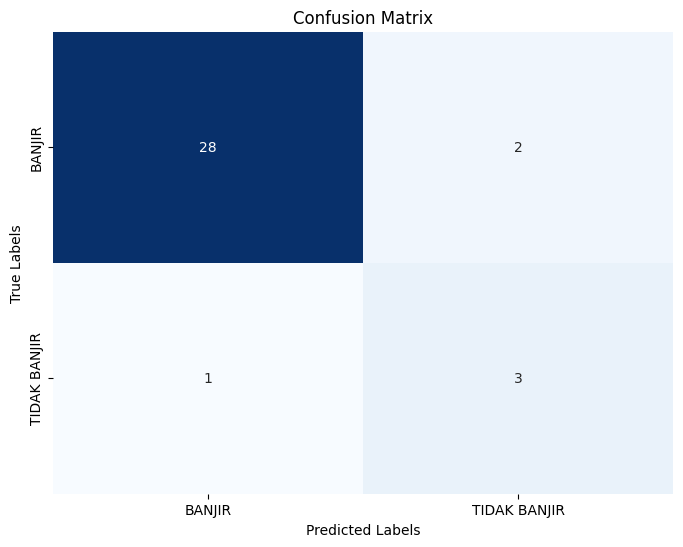

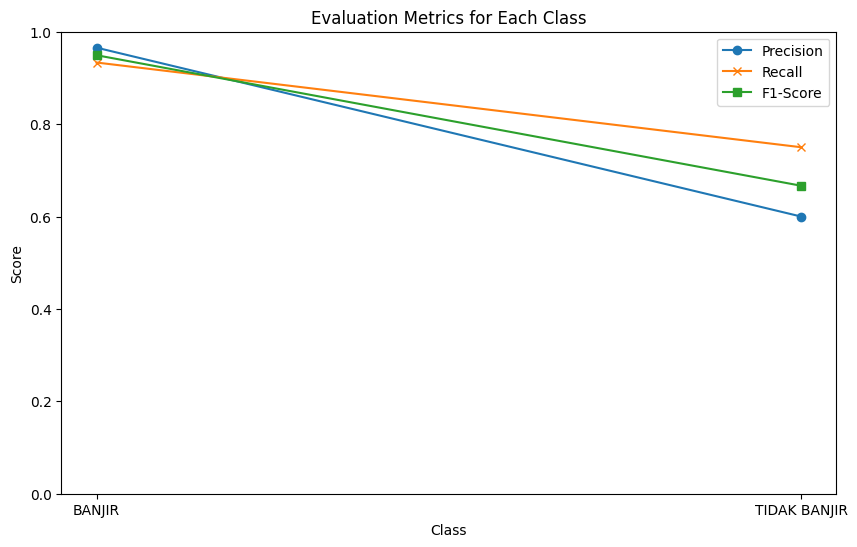

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_recall_fscore_support

# Misal: model sudah dilatih dan data X_test dan y_test sudah ada
# Menggunakan model yang sudah dilatih untuk memprediksi data uji
y_pred = model.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Mencetak laporan klasifikasi
print('Classification Report:\n', classification_report(y_test, y_pred))

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Menampilkan confusion matrix sebagai heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=["BANJIR", "TIDAK BANJIR"],
            yticklabels=["BANJIR", "TIDAK BANJIR"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Menghitung metrik evaluasi
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average=None)

# Menyiapkan data untuk grafik garis
classes = ["BANJIR", "TIDAK BANJIR"]

# Membuat plot untuk precision, recall, dan f1-score
plt.figure(figsize=(10, 6))
plt.plot(classes, precision, marker='o', label='Precision')
plt.plot(classes, recall, marker='x', label='Recall')
plt.plot(classes, f1, marker='s', label='F1-Score')

# Menambahkan judul dan label sumbu
plt.title('Evaluation Metrics for Each Class')
plt.xlabel('Class')
plt.ylabel('Score')
plt.ylim(0, 1)  # Skala untuk metrik evaluasi biasanya dari 0 hingga 1

# Menambahkan legenda
plt.legend()

# Menampilkan grafik
plt.show()


#**MELIHAT SEBERAPA PENTING FITUR**#

In [ ]:
#1. Evaluasi Model dan melihat accuracy nya

feature_scores = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

debit sungai                   0.391882
curah hujan                    0.284222
rata-rata banyak hari hujan    0.141925
suhu max                       0.092276
suhu min                       0.089695
dtype: float64

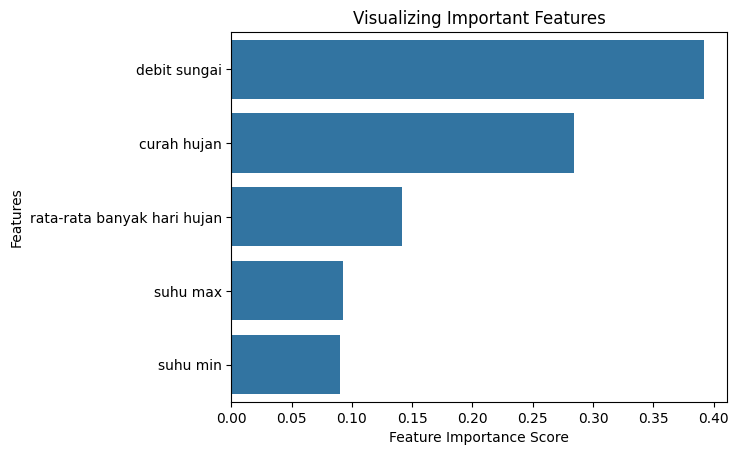

In [ ]:
# 1. Membuat seaborn bar plot
sns.barplot(x=feature_scores, y=feature_scores.index)

# 2. Menambahkan labels pada graphic
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

# 3. Menambahkan title ke graphic
plt.title("Visualizing Important Features")

# Visualisasi dengan print
plt.show()

##**SIMPAN DAN DOWNLOAD MODEL**

In [ ]:
from google.colab import files
#import joblib
# Save Model ke file
#joblib.dump(model, 'prediksi_banjir.pkl')

import pickle

with open('prediksi_banjir.pkl', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
# Download model file
files.download('prediksi_banjir.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**MASUKKAN DATA BARU**

In [ ]:
import pandas as pd
import pickle

# Contoh Data baru dengan nilai dummy
new_data = {
    'curah hujan': [50],  # Ganti dengan nilai sebenarnya
    'rata-rata banyak hari hujan': [3],  # Ganti dengan nilai sebenarnya
    'suhu min': [22],  # Ganti dengan nilai sebenarnya
    'suhu max': [30],  # Ganti dengan nilai sebenarnya
    'debit sungai': [100]  # Ganti dengan nilai sebenarnya
}

# Buat data frame dari data baru
new_df = pd.DataFrame(new_data)

# Muat model dari file dengan pickle
with open('prediksi_banjir.pkl', 'rb') as file:
    model = pickle.load(file)

# Lakukan prediksi
new_prediction = model.predict(new_df)
print('Prediksi: ', 'Banjir' if new_prediction[0] == 1 else 'Tidak Banjir')

Prediksi:  Tidak Banjir
